In [1]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019立委_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fba=pd.merge(fb1,fb2,how="outer")
fb3=pd.read_csv('nysu_10902_2019立委_research_補.csv')
fb4=pd.read_csv('nysu_10902_2019立委_research_補2.csv')
fbb=pd.merge(fb3,fb4,how="outer")

In [2]:
fb=pd.merge(fba,fbb,how="outer")
politics = pd.read_csv('9th_legislator_promise.csv')

以高雄市第七選區（後改為第六選區）立委趙天麟為例，依照月份來統計數值資料的變化

In [3]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [4]:
#政見 有哪些立委
politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [5]:
#fb 總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘', '莊瑞雄', '楊曜Yangyao', '郭國文', '洪宗熠-熠起更好', '陳歐珀', '林俊憲', '蔣萬安',
       '立法委員 馬文君', '鍾佳濱', '費鴻泰（阿力克司）', '何志偉', '余天 Yu Tian', '陳素月SayYes',
       '陳超明-阿明哥粉絲團'], dtype=object)

In [6]:
chao = fb[fb.page_name == "趙天麟"]
# 把時間格式轉換
chao['new_date'] = pd.to_datetime(chao['created_time_taipei']).dt.date
chao['post_hour'] = pd.to_datetime(chao['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
chao['month_year'] = pd.to_datetime(chao['new_date']).dt.to_period('M')
chao.head(1)

<ipython-input-6-148f8ca4c9b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chao['new_date'] = pd.to_datetime(chao['created_time_taipei']).dt.date
<ipython-input-6-148f8ca4c9b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chao['post_hour'] = pd.to_datetime(chao['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-6-148f8ca4c9b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
1910,109004835824305_2132255086832593,109004835824305,趙天麟,政治人物,【奇聞共享】\n\n「茲因市長人氣居高不下，市府已然成為本市另類的觀光景點，建請觀光局研議於...,NaN,photo,https://www.facebook.com/109004835824305/posts...,2019-01-15T08:43:50+0000,2019-01-15T16:43:50,...,0,0,0,0,0,79,23,2019-01-15,16,2019-01


In [7]:
#發文時間分佈
post_time = chao[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,6
1,1,1
2,4,2
3,5,2
4,6,1
5,7,14
6,8,23
7,9,41
8,10,36
9,11,53


In [8]:
chao[chao.created_time_taipei == max(chao.created_time_taipei)]
#找出時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
2478,109004835824305_2645704752211800,109004835824305,趙天麟,政治人物,#奮戰到最後一刻\n\n【LIVE直播中】\n\n瑞豐大團結趙天麟選前車隊大掃街,趙天麟的直播影片。,video,https://www.facebook.com/skychao6238/videos/26...,2020-01-10T11:58:36+0000,2020-01-10T19:58:36,...,0,0,0,0,0,175,39,2020-01-10,19,2020-01


In [9]:
chao[chao.created_time_taipei == min(chao.created_time_taipei)]
#找出時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
1930,109004835824305_2110945055630263,109004835824305,趙天麟,政治人物,新年快樂🎉\n\n所有的朋友們，新的一年，祝福滿滿！,NaN,photo,https://www.facebook.com/109004835824305/posts...,2018-12-31T16:24:54+0000,2019-01-01T00:24:54,...,0,0,0,0,0,36,2,2019-01-01,0,2019-01


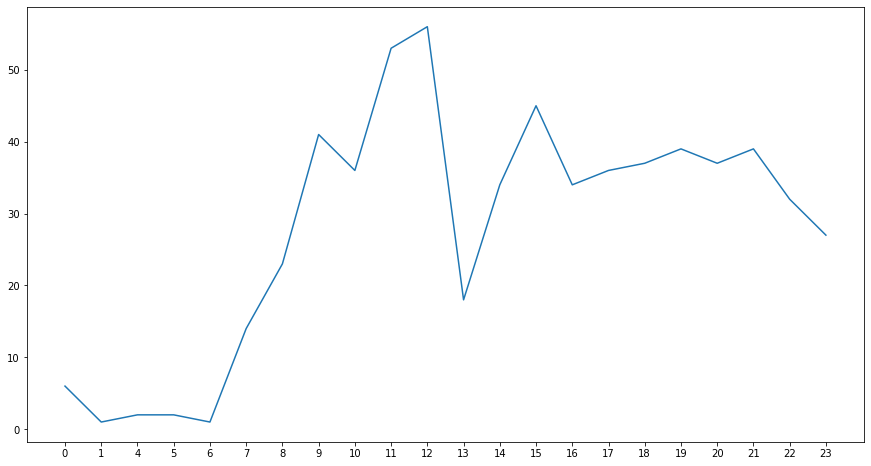

In [10]:
#畫出整年發布時間貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [11]:
#整年貼文數量分佈
whole_year = chao[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,40
1,2019-02,38
2,2019-03,44
3,2019-04,40
4,2019-05,38
5,2019-06,55
6,2019-07,53
7,2019-08,55
8,2019-09,40
9,2019-10,46


In [12]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,13.000000
mean,47.153846
std,10.675877
min,33.000000
25%,40.000000
50%,44.000000
75%,55.000000
max,67.000000


In [13]:
results = chao.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,4360193432972200,15753,0,0,0,0,0,1943,426,534
2019-02,4142183761323590,18115,0,0,0,0,0,2424,557,552
2019-03,4796212776269420,36581,0,0,0,0,0,4167,573,670
2019-04,4360193432972200,50847,0,0,0,0,0,4345,449,621
2019-05,4142183761323590,32592,0,0,0,0,0,2350,331,580
2019-06,5995265970336775,61901,0,0,0,0,0,3750,736,824
2019-07,5777256298688165,108069,0,0,0,0,0,5155,2006,737
2019-08,5995265970336775,130074,0,0,0,0,0,6190,2420,902
2019-09,4360193432972200,132079,0,0,0,0,0,6455,2054,592


In [14]:
results.index.name = 'newhead' #將上行定義出的results索引標籤命名為newhead
results.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列，個人覺得意義不大
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,4360193432972200,15753,0,0,0,0,0,1943,426,534
1,2019-02,4142183761323590,18115,0,0,0,0,0,2424,557,552
2,2019-03,4796212776269420,36581,0,0,0,0,0,4167,573,670
3,2019-04,4360193432972200,50847,0,0,0,0,0,4345,449,621
4,2019-05,4142183761323590,32592,0,0,0,0,0,2350,331,580
5,2019-06,5995265970336775,61901,0,0,0,0,0,3750,736,824
6,2019-07,5777256298688165,108069,0,0,0,0,0,5155,2006,737
7,2019-08,5995265970336775,130074,0,0,0,0,0,6190,2420,902
8,2019-09,4360193432972200,132079,0,0,0,0,0,6455,2054,592
9,2019-10,5014222447918030,225785,0,0,0,0,0,7900,3425,693


In [15]:
results['newhead'].map(str)#將索引標籤newhead那欄中所有資料轉為字串格式

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

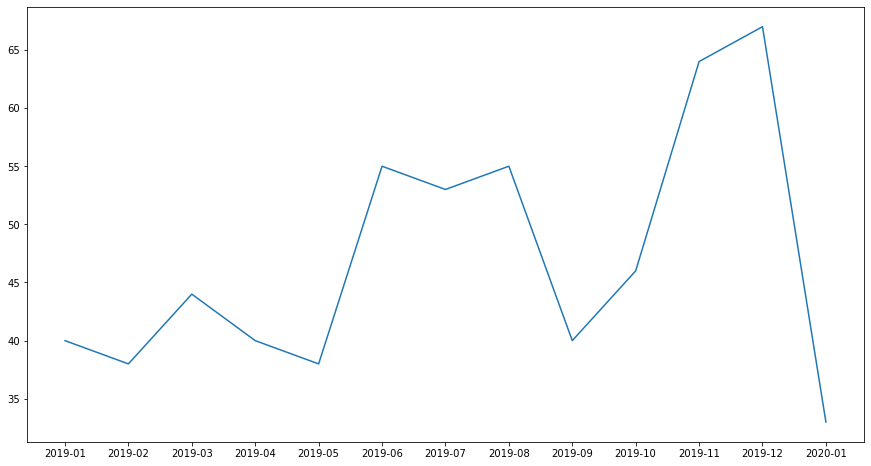

In [16]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

In [17]:
# 每個月的按讚、評論、分享總數 分佈
results = chao.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,4360193432972200,15753,0,0,0,0,0,1943,426,534
1,2019-02,4142183761323590,18115,0,0,0,0,0,2424,557,552
2,2019-03,4796212776269420,36581,0,0,0,0,0,4167,573,670
3,2019-04,4360193432972200,50847,0,0,0,0,0,4345,449,621
4,2019-05,4142183761323590,32592,0,0,0,0,0,2350,331,580
5,2019-06,5995265970336775,61901,0,0,0,0,0,3750,736,824
6,2019-07,5777256298688165,108069,0,0,0,0,0,5155,2006,737
7,2019-08,5995265970336775,130074,0,0,0,0,0,6190,2420,902
8,2019-09,4360193432972200,132079,0,0,0,0,0,6455,2054,592
9,2019-10,5014222447918030,225785,0,0,0,0,0,7900,3425,693


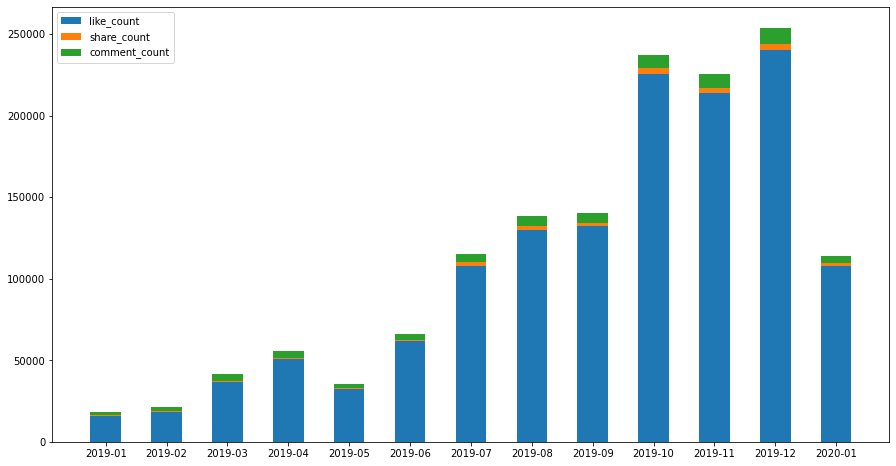

In [18]:
#整年按讚、評論、分享數

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

In [19]:
# 很明顯10月按讚、分享、評論數衝上去，因此找出10月的資料
high = chao[chao.month_year == "2019-10"]
results_high = high.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-10-01,109004835824305,5982,0,0,0,0,0,220,202,9
1,2019-10-02,109004835824305,3595,0,0,0,0,0,168,125,15
2,2019-10-03,218009671648610,5515,0,0,0,0,0,228,59,27
3,2019-10-05,109004835824305,6740,0,0,0,0,0,113,71,11
4,2019-10-06,218009671648610,10746,0,0,0,0,0,392,79,41
5,2019-10-07,327014507472915,12840,0,0,0,0,0,358,124,58
6,2019-10-09,218009671648610,3162,0,0,0,0,0,107,110,22
7,2019-10-10,218009671648610,15322,0,0,0,0,0,280,127,27
8,2019-10-11,109004835824305,705,0,0,0,0,0,27,17,16
9,2019-10-12,218009671648610,2553,0,0,0,0,0,63,36,23


No handles with labels found to put in legend.


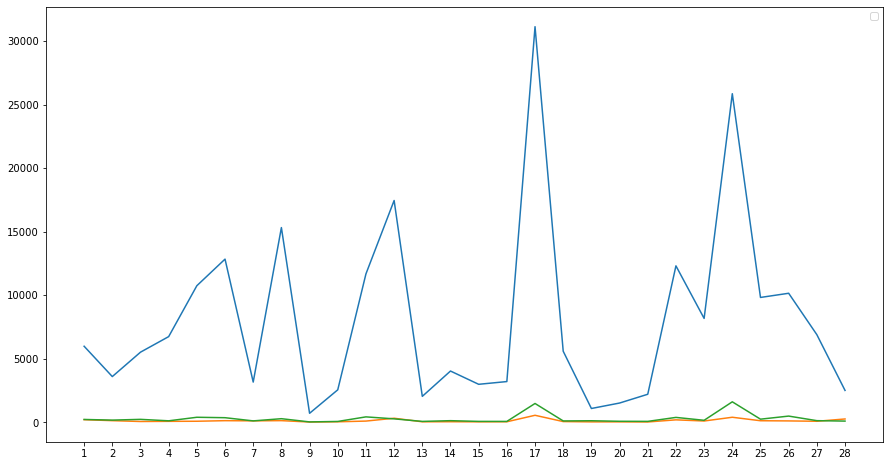

In [20]:
#畫圖 看整個月按讚、分享、評論的流量
labels = [str(i) for i in range(1,29)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

In [21]:
#10/19 號很明顯按讚最高  因此找出這天的文章
chao['new_date']=chao['new_date'].map(str) # turn 'new_date' into str
Oct_19 = chao[chao['new_date'] == "2019-10-19"]
Oct_19[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-21-36fbdc883fa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chao['new_date']=chao['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
2341,猜到神秘嘉賓是誰了嗎？ 今天我特別感謝卓榮泰主席，特地南下為天麟加油。卓榮泰主席現在的工作...,262,16174
2342,2019高雄樂活節《寶島歌王之夜》live演出就在內惟國小！ 天麟帶來《腳踏車》、《傷心的人...,669,6927
2343,2019高雄樂活節《寶島歌王之夜》鼓山區內惟國小開唱囉！ 各位鄉親序大～緊逗陣來聽台灣金曲演...,466,6588
2344,#快來看創意多多的親子變裝 《萬聖節超級變變變》直播live 就在小天地 Skyland！ ...,80,1445


In [22]:
#找出評論數量的統計值
chao['comment_count'].describe()

count     613.000000
mean      110.629690
std       178.773915
min         0.000000
25%        24.000000
50%        57.000000
75%       123.000000
max      1947.000000
Name: comment_count, dtype: float64

In [23]:
#找出按讚數量的統計值
chao['like_count'].describe()

count      613.000000
mean      2240.996737
std       3104.667736
min         29.000000
25%        568.000000
50%       1251.000000
75%       2434.000000
max      25569.000000
Name: like_count, dtype: float64

In [24]:
# 比較、查看他政見
promise = politics[politics.姓名 == "趙 天 麟"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['66    產業的高雄－創新引資，經濟躍昇，亞洲新灣區將成為南台灣產業轉型的領頭羊 1.傳統優勢產業升級...']

In [25]:
#按讚次數最少的貼文 
lastlike_10 = chao.sort_values(by = ['like_count'],ascending = True).head(10)
lastlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
2223,NaN,29,2019-08
2152,「親子共讀要從幾歲開始呀？」 「我的孩子根本坐不住要怎麼親子共讀？」 國民健康署明天中午1...,70,2019-06
1924,NaN,84,2019-01
1941,雅慧議員當選後首次直播，朋友們一起來為「星願烏克麗麗樂團」加油💪,122,2019-01
2069,🎥直播預告21:00 如果說今天的大地震嚇了你一跳，那麼重量級優質國片被盜版洩漏，就更是一場...,150,2019-04
1929,連假結束囉！！朋友們收心了嗎！！ 請鎖定天麟臉書，會有來自日本的豬年小禮物有獎徵答活動喔！！...,163,2019-01
1952,鼓山區青海路橋即將拆除！ 從2/16開始進行青海陸橋拆除工程，為期一個月，天麟提醒住在附近...,169,2019-02
1982,一起重溫運動筆記為跑友、為高雄留下的精彩足跡！ #天麟在哪裡 #高雄馬拉松,171,2019-02
1942,送往者最後一程，是身為民代對選民很重要的心意。 高雄市立殯儀館附近唯一一家的豆漿店，是我參...,174,2019-01
2064,昨晚大家有看《我們與惡的距離》完結篇嗎？衝擊、揪心與感動是如此的深刻。 推薦Netflix...,176,2019-04


In [26]:
#按讚次數最多的貼文 
mostlike_10 = chao.sort_values(by = ['like_count'],ascending = False).head(10)
mostlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
2419,#萬人拚場挺小英 #感謝超過萬名市民朋友到場展現高雄人的氣勢與決心 #戰頭功拚頭名第六選區要...,25569,2019-12
2485,#用選票表達高雄人的憤怒 #將韓留在高雄罷免才能成立 #一月十一日出來投票吧 趙天麟昨邀請...,23283,2020-01
2280,#奇蹟似的放晴了 #5000個大小朋友的感動 仲夏夜的序曲 兒童歡樂的笑聲 第九年的高雄樂...,23066,2019-08
2439,經過了8年的努力，「壽山自然公園籌備處」終於以「國家自然公園管理處」正式揭牌成立！ 「國家...,21432,2019-11
2331,#謝謝今天所有出席的真勇者 真勇者說的不僅僅是今天特地從台中到高雄為我助選的陳柏惟；說的不...,19978,2019-10
2431,#萬人拚場挺小英挺天麟我們總部成立大會不見不散 ［挺民主！顧台灣！］ 天麟誠摯邀請您，1...,18321,2019-12
2350,#寶島歌王之夜來囉 天麟邀請您 10/19 (六) 晚上七點，內惟國小金嗓開唱🎤 #陳思...,17454,2019-10
2341,猜到神秘嘉賓是誰了嗎？ 今天我特別感謝卓榮泰主席，特地南下為天麟加油。卓榮泰主席現在的工作...,16174,2019-10
2308,#中秋節快樂 一年之中，最有團圓氛圍的節慶，除了農曆新年，就是中秋節了！ 這兩個週末，我...,13506,2019-09
2313,🎃小天地超級變變變萬聖節派對🎃 你想好要變成什麼厲害的角色了嗎？ 跟著偵探天麟叔叔一起去闖...,13274,2019-10


In [28]:
#趙天麟的最少讚數前10的文章的 種類 video / photo?
lastlike_10 = chao.sort_values(by = ['like_count'],ascending= True ).head(10)
lastlike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
photo,6,6,6,6,5,1,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
status,1,1,1,1,1,0,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
video,3,3,3,3,2,2,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [29]:
#趙天麟的最多讚數前10的文章的 種類 video / photo?
lastlike_10 = chao.sort_values(by = ['like_count'],ascending= False ).head(10)
lastlike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
photo,10,10,10,10,10,1,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


1. 曝光度高貼文強調地方深耕、總統帶小雞
2. 罷韓貼文出現
3. 曝光度較高較無中國因素的文章